# # Project IRIS


In [1]:
from warnings import filterwarnings
filterwarnings('ignore')

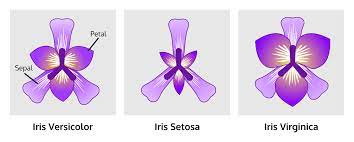

In [2]:
import pandas as pd
A=pd.read_csv("iris.csv")
A

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,virginica
146,6.3,2.5,5.0,1.9,virginica
147,6.5,3.0,5.2,2.0,virginica
148,6.2,3.4,5.4,2.3,virginica


In [3]:
A.info

<bound method DataFrame.info of      sepal_length  sepal_width  petal_length  petal_width    species
0             5.1          3.5           1.4          0.2     setosa
1             4.9          3.0           1.4          0.2     setosa
2             4.7          3.2           1.3          0.2     setosa
3             4.6          3.1           1.5          0.2     setosa
4             5.0          3.6           1.4          0.2     setosa
..            ...          ...           ...          ...        ...
145           6.7          3.0           5.2          2.3  virginica
146           6.3          2.5           5.0          1.9  virginica
147           6.5          3.0           5.2          2.0  virginica
148           6.2          3.4           5.4          2.3  virginica
149           5.9          3.0           5.1          1.8  virginica

[150 rows x 5 columns]>

In [4]:
A['species'].unique()

array(['setosa', 'versicolor', 'virginica'], dtype=object)

In [6]:
A['species'].value_counts()

species
setosa        50
versicolor    50
virginica     50
Name: count, dtype: int64

<Axes: xlabel='species'>

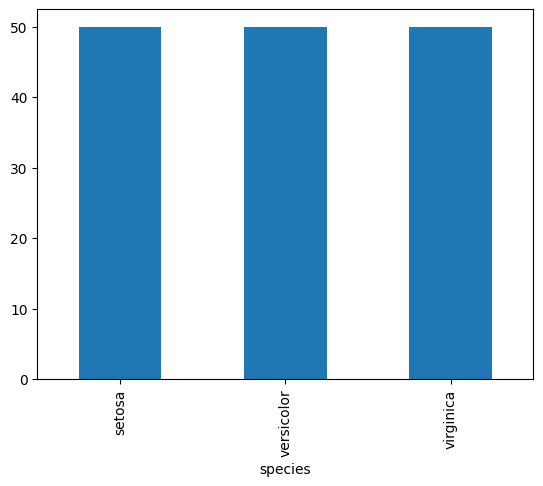

In [7]:
A['species'].value_counts().plot(kind='bar')

Seperate X,Y

In [8]:
X=A.drop(columns=['species'])
Y=A[['species']]

In [9]:
X.head()

,sepal_length,sepal_width,petal_length,petal_width
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2


In [10]:
Y.head()

,species
0,setosa
1,setosa
2,setosa
3,setosa
4,setosa


### Apply Label Encoding on Y feature

In [11]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
Y['species']= le.fit_transform(Y['species'])

In [12]:
Y.value_counts()

species
0          50
1          50
2          50
Name: count, dtype: int64

In [13]:
Y

,species
0,0
1,0
2,0
3,0
4,0
...,...
145,2
146,2
147,2
148,2


### Save the label encoder as pickle file

In [14]:
import pickle
with open('LabelEnc.pkl','wb') as file1:
    pickle.dump(le,file1)

### Preprocessing of X


In [15]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_pre = pd.DataFrame(scaler.fit_transform(X),columns=X.columns)
X_pre.head()

,sepal_length,sepal_width,petal_length,petal_width
0,-0.900681,1.019004,-1.340227,-1.315444
1,-1.143017,-0.131979,-1.340227,-1.315444
2,-1.385353,0.328414,-1.397064,-1.315444
3,-1.506521,0.098217,-1.283389,-1.315444
4,-1.021849,1.249201,-1.340227,-1.315444


In [17]:
X.columns

Index(['sepal_length', 'sepal_width', 'petal_length', 'petal_width'], dtype='object')

### Save the scaler in pkl format

In [18]:
with open('Scaler.pkl','wb') as file2:
    pickle.dump(scaler, file2)

### Train Test split

In [19]:
from sklearn.model_selection import train_test_split
xtrain,xtest,ytrain,ytest=train_test_split(X_pre,Y, test_size=0.33, random_state=42)

In [20]:
xtrain.shape

(100, 4)

In [21]:
xtest.shape

(50, 4)

### Create the model

In [22]:
params = {'n_neighbors':[2,3,4,5,6,7,8]}

In [23]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import GridSearchCV
knc = KNeighborsClassifier()
gscv = GridSearchCV(knc, param_grid=params, cv=5, scoring='f1_macro')
gscv.fit(xtrain,ytrain)

GridSearchCV(cv=5, estimator=KNeighborsClassifier(),
             param_grid={'n_neighbors': [2, 3, 4, 5, 6, 7, 8]},
             scoring='f1_macro')

In [24]:
gscv.best_params_

{'n_neighbors': 3}

In [25]:
gscv.best_score_

0.9319552669552669

In [26]:
best_knn = gscv.best_estimator_
best_knn

KNeighborsClassifier(n_neighbors=3)

### Save the model file in pkl format

In [27]:
with open('best_knn.pkl','wb') as file3:
    pickle.dump(best_knn,file3)

### Evaluate the model

In [28]:
best_knn.score(xtrain,ytrain)

0.95

In [29]:
best_knn.score(xtest,ytest)

0.98

### Plot confusion matrix

In [30]:
ypred_tr = best_knn.predict(xtrain)
ypred_ts = best_knn.predict(xtest)

In [34]:
ypred_ts[0:5]

array([1, 0, 2, 1, 1])

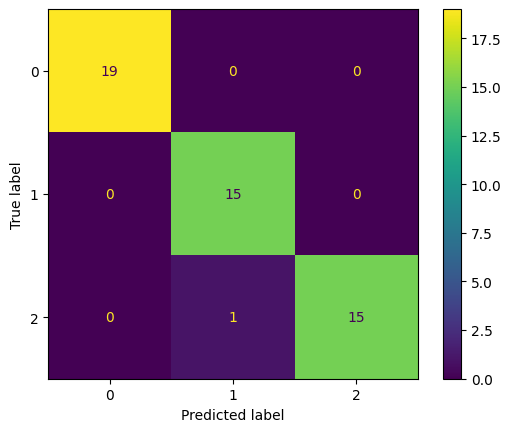

In [32]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
cf = confusion_matrix(ytest, ypred_ts)
cfd = ConfusionMatrixDisplay(cf, display_labels=best_knn.classes_)
cfd.plot()

### Classification Report

In [35]:
from sklearn.metrics import classification_report
print(classification_report(ytest,ypred_ts))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        19
           1       0.94      1.00      0.97        15
           2       1.00      0.94      0.97        16

    accuracy                           0.98        50
   macro avg       0.98      0.98      0.98        50
weighted avg       0.98      0.98      0.98        50



### Getting orignal labels

In [36]:
ypred_tr_lb = le.inverse_transform(ypred_tr)
ypred_ts_lb = le.inverse_transform(ypred_ts)

In [37]:
ypred_tr_lb

array(['versicolor', 'virginica', 'versicolor', 'setosa', 'virginica',
       'versicolor', 'setosa', 'setosa', 'setosa', 'versicolor',
       'virginica', 'setosa', 'setosa', 'setosa', 'versicolor', 'setosa',
       'versicolor', 'virginica', 'setosa', 'versicolor', 'virginica',
       'setosa', 'virginica', 'virginica', 'versicolor', 'versicolor',
       'virginica', 'versicolor', 'setosa', 'versicolor', 'virginica',
       'setosa', 'setosa', 'versicolor', 'versicolor', 'setosa',
       'virginica', 'setosa', 'setosa', 'virginica', 'versicolor',
       'virginica', 'virginica', 'versicolor', 'virginica', 'versicolor',
       'setosa', 'setosa', 'versicolor', 'virginica', 'setosa', 'setosa',
       'setosa', 'versicolor', 'virginica', 'setosa', 'virginica',
       'virginica', 'setosa', 'versicolor', 'versicolor', 'virginica',
       'versicolor', 'virginica', 'setosa', 'virginica', 'versicolor',
       'virginica', 'versicolor', 'versicolor', 'versicolor', 'setosa',
       'versicol

In [38]:
ypred_ts_lb

array(['versicolor', 'setosa', 'virginica', 'versicolor', 'versicolor',
       'setosa', 'versicolor', 'virginica', 'versicolor', 'versicolor',
       'virginica', 'setosa', 'setosa', 'setosa', 'setosa', 'versicolor',
       'virginica', 'versicolor', 'versicolor', 'virginica', 'setosa',
       'virginica', 'setosa', 'virginica', 'virginica', 'virginica',
       'virginica', 'virginica', 'setosa', 'setosa', 'setosa', 'setosa',
       'versicolor', 'setosa', 'setosa', 'virginica', 'versicolor',
       'setosa', 'setosa', 'setosa', 'virginica', 'versicolor',
       'versicolor', 'setosa', 'setosa', 'versicolor', 'versicolor',
       'virginica', 'versicolor', 'virginica'], dtype=object)

In [39]:
best_knn.predict_proba(xtest)

array([[0.        , 1.        , 0.        ],
       [1.        , 0.        , 0.        ],
       [0.        , 0.        , 1.        ],
       [0.        , 1.        , 0.        ],
       [0.        , 1.        , 0.        ],
       [1.        , 0.        , 0.        ],
       [0.        , 1.        , 0.        ],
       [0.        , 0.        , 1.        ],
       [0.        , 0.66666667, 0.33333333],
       [0.        , 1.        , 0.        ],
       [0.        , 0.        , 1.        ],
       [1.        , 0.        , 0.        ],
       [1.        , 0.        , 0.        ],
       [1.        , 0.        , 0.        ],
       [1.        , 0.        , 0.        ],
       [0.        , 0.66666667, 0.33333333],
       [0.        , 0.        , 1.        ],
       [0.        , 1.        , 0.        ],
       [0.        , 1.        , 0.        ],
       [0.        , 0.        , 1.        ],
       [1.        , 0.        , 0.        ],
       [0.        , 0.        , 1.        ],
       [1.

In [40]:
def predict_data():
    sep_len = float(input('Please Enter Sepal Length : '))
    sep_wid = float(input('Please Enter Sepal Width : '))
    pet_len = float(input('Please Enter Petal Length : '))
    pet_wid = float(input('Please Enter Petal Width : '))

    xnew = pd.DataFrame([sep_len, sep_wid, pet_len, pet_wid]).T
    xnew.columns = ['sepal_length', 'sepal_width', 'petal_length', 'petal_width']

    print('Dataframe before preprocessing :\n')
    display(xnew)

    xnew_pre = pd.DataFrame(scaler.transform(xnew),columns=xnew.columns)
    print(f'DataFrame after Preprocessing :\n')
    display(xnew_pre)

    pred = best_knn.predict(xnew_pre)
    pred_lb = le.inverse_transform(pred)[0]

    prob = best_knn.predict_proba(xnew_pre).max()

    print(f'Predicted Species : {pred_lb}')
    print(f'Probability : {prob}')

In [41]:
predict_data()

Dataframe before preprocessing :



,sepal_length,sepal_width,petal_length,petal_width
0,2.1,1.0,0.3,3.0


DataFrame after Preprocessing :



,sepal_length,sepal_width,petal_length,petal_width
0,-4.535717,-4.735915,-1.965438,2.370257


Predicted Species : versicolor
Probability : 0.6666666666666666
